# Read Dataset

In [159]:
socar = pd.read_csv('insurance_fraud_detect_data.csv')
socar.drop(columns=['test_set','total_prsn_cnt'], inplace=True)
socar.tail()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN
15995,0,2,0,2,0,2,0,100,2,0,...,1,0.0000,0,1,1,0,1,0,0,0
15996,0,2,0,2,1,4,0,100,1,1,...,6,618439.4418,0,2,1,0,1,0,0,0
15997,0,2,1,2,0,4,0,100,1,0,...,5,0.0000,0,0,0,0,1,0,0,0
15998,0,2,0,2,0,2,0,100,2,0,...,2,0.0000,0,4,1,0,1,0,0,0
15999,0,2,0,2,0,1,0,100,1,0,...,6,391560.2156,1188750,2,0,0,1,0,0,0


# EDA

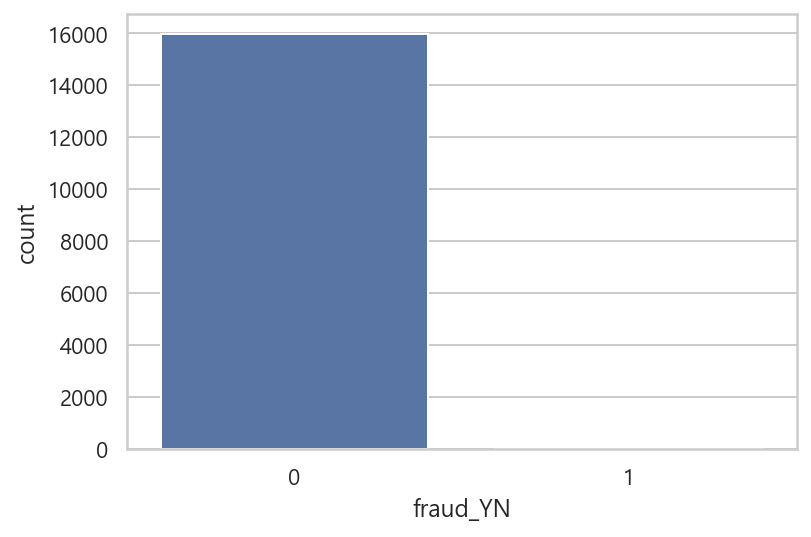

In [160]:
sns.countplot(data=socar, x='fraud_YN');

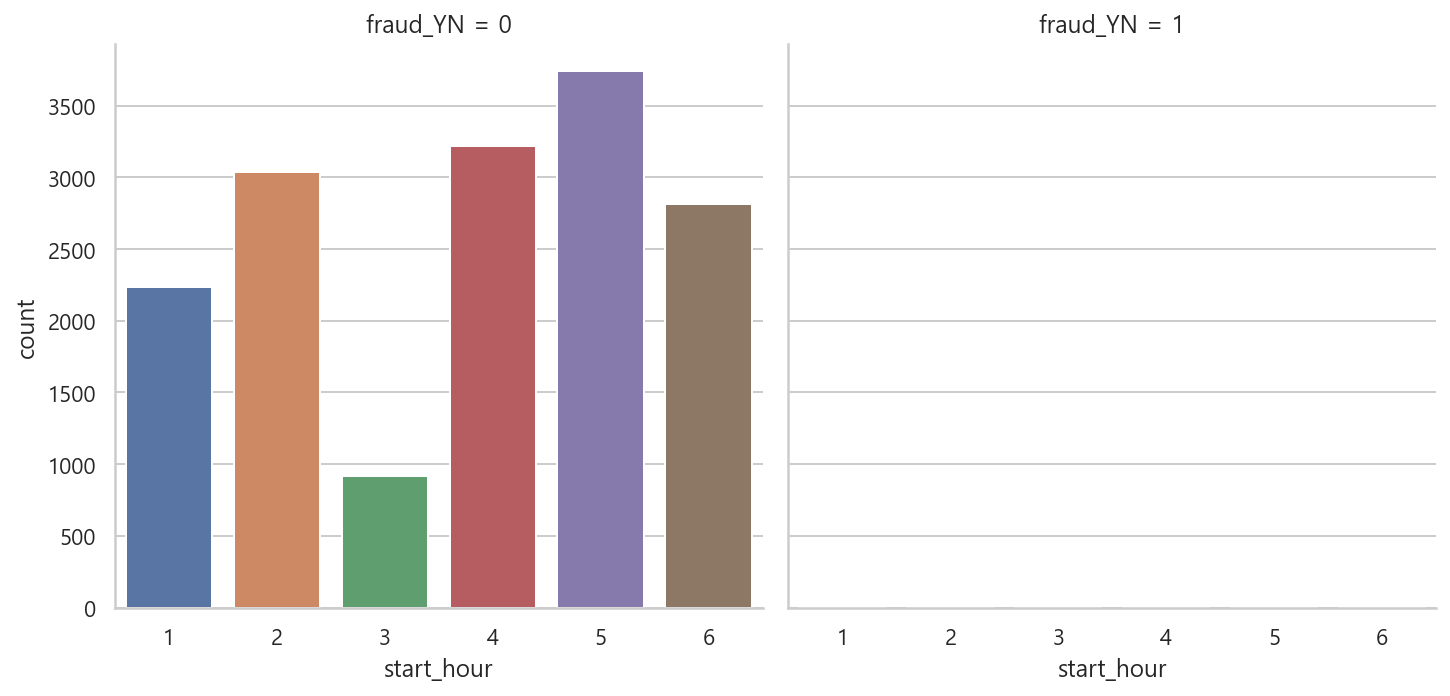

In [161]:
sns.catplot(data=socar, x='start_hour', col='fraud_YN', kind="count");

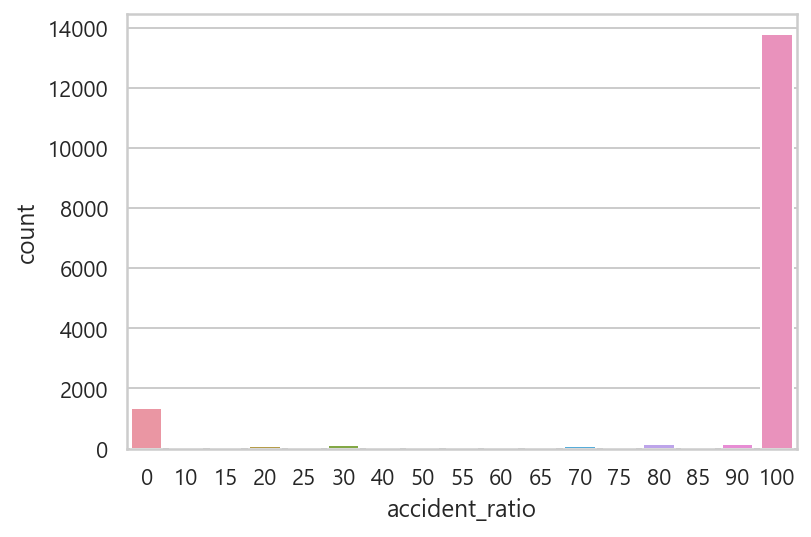

In [162]:
sns.countplot(data=socar, x='accident_ratio');

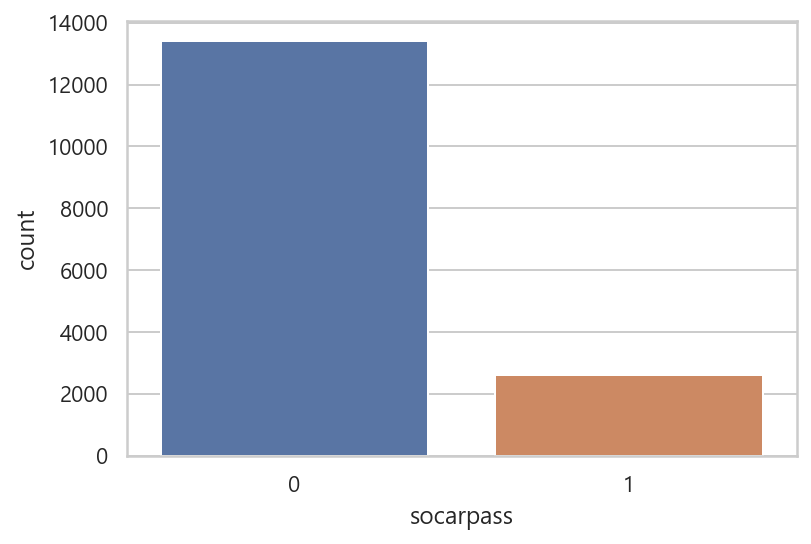

In [163]:
sns.countplot(data=socar, x='socarpass');

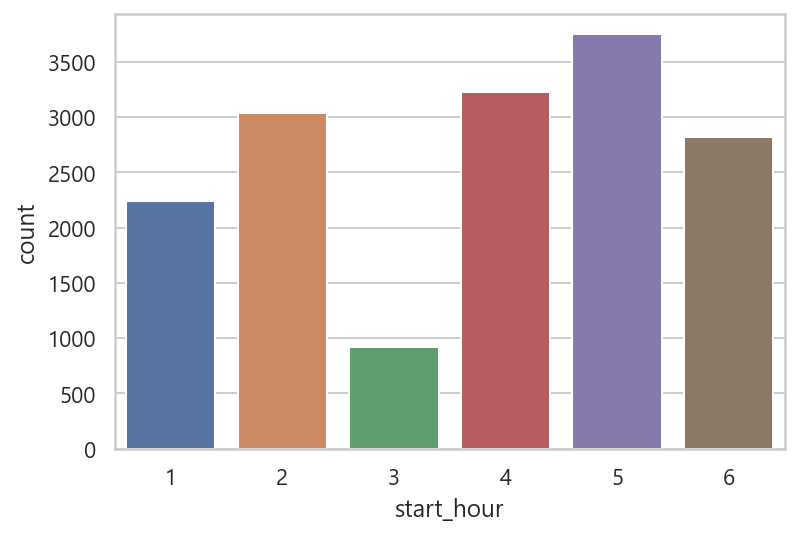

In [164]:
sns.countplot(data=socar, x='start_hour');

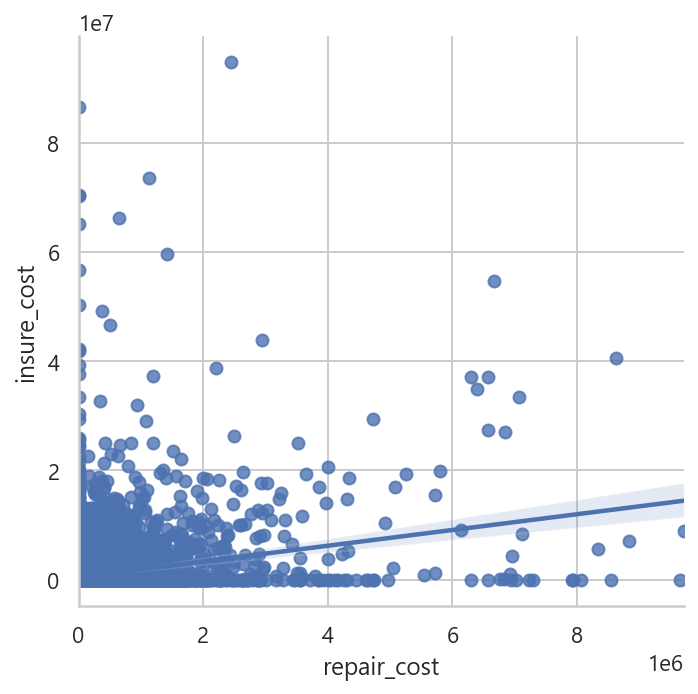

In [165]:
sns.lmplot(data=socar, x='repair_cost', y='insure_cost');

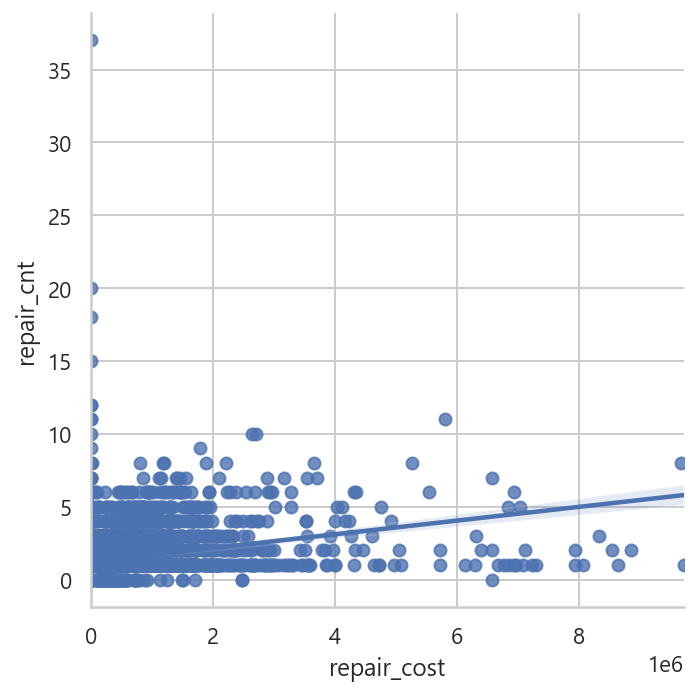

In [166]:
sns.lmplot(data=socar, x='repair_cost', y='repair_cnt');

In [167]:
socar.corr().iloc[0]

fraud_YN                 1.000000
car_model               -0.002440
sharing_type             0.000843
age_group               -0.007287
has_previous_accident    0.002222
cumulative_use_count    -0.002924
b2b                     -0.004120
accident_ratio           0.012013
pf_type                 -0.009864
socarpass               -0.002270
socarsave                0.012379
start_hour              -0.002098
duration                 0.012443
accident_hour           -0.002251
repair_cost              0.003409
insure_cost              0.002019
accident_location       -0.009159
car_part1                0.011833
car_part2               -0.003604
repair_cnt              -0.007751
acc_type1                0.024653
insurance_site_aid_YN    0.020999
police_site_aid_YN       0.019109
Name: fraud_YN, dtype: float64

# Preprocessing

In [168]:
repair_cost_mean = socar[(socar['repair_cost'] < 3000000) & (socar['repair_cost'] > 100000)]['repair_cost'].mean(), 
repair_cost_median = socar[(socar['repair_cost'] < 3000000) & (socar['repair_cost'] > 100000)]['repair_cost'].median()

In [169]:
socar['repair_cost'][(socar['repair_cost'] >= 3000000)] = repair_cost_mean
socar['repair_cost'][(socar['repair_cost'] <= 100000)] = repair_cost_mean

In [170]:
insure_cost_mean = socar[(socar['insure_cost'] < 3000000) & (socar['insure_cost'] > 100000)]['insure_cost'].mean(), 
insure_cost_median = socar[(socar['insure_cost'] < 3000000) & (socar['insure_cost'] > 100000)]['insure_cost'].median()

In [171]:
socar['insure_cost'][(socar['insure_cost'] >= 3000000)] = insure_cost_mean
socar['insure_cost'][(socar['insure_cost'] <= 100000)] = insure_cost_mean

In [172]:
socar.tail()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN
15995,0,2,0,2,0,2,0,100,2,0,...,1,435571.276189,1.004197e+06,1,1,0,1,0,0,0
15996,0,2,0,2,1,4,0,100,1,1,...,6,618439.441800,1.004197e+06,2,1,0,1,0,0,0
15997,0,2,1,2,0,4,0,100,1,0,...,5,435571.276189,1.004197e+06,0,0,0,1,0,0,0
15998,0,2,0,2,0,2,0,100,2,0,...,2,435571.276189,1.004197e+06,4,1,0,1,0,0,0
15999,0,2,0,2,0,1,0,100,1,0,...,6,391560.215600,1.188750e+06,2,0,0,1,0,0,0


# Scaling
- OneHotEncoder & MinMaxScaler

In [173]:
from sklearn.compose import ColumnTransformer

cat_attribs = ['car_model', 'sharing_type', 'age_group',
       'has_previous_accident', 'cumulative_use_count', 'b2b',
        'pf_type', 'socarpass', 'socarsave', 'start_hour',
       'duration', 'accident_hour',
       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',
       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN']

num_attribs = ['accident_ratio', 'repair_cost', 'insure_cost',]

full_pipeline = ColumnTransformer([('scaler', MinMaxScaler(), num_attribs),
              ('cat', OneHotEncoder(), cat_attribs),
             ])
socar_scaled = full_pipeline.fit_transform(socar)
socar_scaled.shape

(16000, 84)

# Split dataset

In [174]:
from sklearn.model_selection import train_test_split

X = socar_scaled
y = socar['fraud_YN'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [175]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([12767,    33], dtype=int64))

In [176]:
tmp_tr = np.unique(y_train, return_counts=True)[1]
tmp_test = np.unique(y_test, return_counts=True)[1]

print("ratio of y_train per x_train :", tmp_tr[1]/len(y_train) * 100)
print("ratio of y_test per x_test :", tmp_test[1]/len(y_test) * 100)

ratio of y_train per x_train : 0.2578125
ratio of y_test per x_test : 0.25


# Evaluation

In [177]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [178]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('===========')
    
    print('Accuracy : {0:.4f}, Precision:{1:.4f}'.format(acc, pre))
    print('Recall : {0:.4f}, F1:{1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [192]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=10, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[3192    0]
 [   8    0]]
Accuracy : 0.9975, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [193]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[3192    0]
 [   8    0]]
Accuracy : 0.9975, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [194]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> confusion matrix
[[3192    0]
 [   8    0]]
Accuracy : 0.9975, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [195]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3192
           1       0.00      0.00      0.00         8

    accuracy                           1.00      3200
   macro avg       0.50      0.50      0.50      3200
weighted avg       1.00      1.00      1.00      3200



# Over Sampling

In [196]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [197]:
X_train.shape, y_train.shape, X_train_over.shape, y_train_over.shape

((12800, 84), (12800,), (25534, 84), (25534,))

In [198]:
np.unique(y_train, return_counts=True), np.unique(y_train_over, return_counts=True)

((array([0, 1], dtype=int64), array([12767,    33], dtype=int64)),
 (array([0, 1], dtype=int64), array([12767, 12767], dtype=int64)))

In [199]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [200]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [201]:
models = [dt_clf, rf_clf, lgbm_clf]
models_names = ['DecisionTree', 'RandomForest','LightGBM']

start_time = time.time()
results = get_result_pd(models, models_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  3.3865442276000977


,accuracy,precision,recall,f1,roc_auc
DecisionTree,0.864062,0.002331,0.125,0.004577,0.495457
RandomForest,0.997500,0.000000,0.000,0.000000,0.500000
LightGBM,0.997500,0.000000,0.000,0.000000,0.500000


# Hyper Parameter Tuning

In [227]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [2,4,6,8]}
socar_tree = DecisionTreeClassifier(max_depth=2, random_state=10)

gridsearch = GridSearchCV(estimator=socar_tree, param_grid=params, cv=5, scoring='recall')
gridsearch.fit(X, y)
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=10)

In [224]:
params = {'n_estimators' : [50, 100, 150, 200]}
socar_random = RandomForestClassifier(random_state=10, n_jobs=-1, n_estimators=100)

gridsearch = GridSearchCV(estimator=socar_random, param_grid=params, cv=5, scoring='recall')
gridsearch.fit(X, y)
gridsearch.best_estimator_

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=10)

In [205]:
params = {'n_estimators' : [400, 600, 800, 1000], 'num_leaves' : [16, 32, 64, 128]}
socar_lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

gridsearch = GridSearchCV(estimator=socar_lgbm, param_grid=params, cv=5, scoring='recall')
gridsearch.fit(X, y)
gridsearch.best_estimator_

LGBMClassifier(boost_from_average=False, n_estimators=400, num_leaves=16)

# 2nd Trial
- MinMaxScaler Only
- Hyper Parameter Tuning

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_ss = StandardScaler()
scaler_mm = MinMaxScaler()

socar['accident_ratio'] = scaler_mm.fit_transform(socar['accident_ratio'].values.reshape(-1,1))
socar['repair_cost'] = scaler_mm.fit_transform(socar['repair_cost'].values.reshape(-1,1))
socar['insure_cost'] = scaler_mm.fit_transform(socar['insure_cost'].values.reshape(-1,1))

In [238]:
from sklearn.model_selection import train_test_split

X = socar.drop(['fraud_YN'], axis=1)
y = socar['fraud_YN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [239]:
dt_clf = DecisionTreeClassifier(random_state=10, max_depth=2)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

rf_clf = RandomForestClassifier(random_state=10, n_jobs=-1, n_estimators=50)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

lgbm_clf = LGBMClassifier(n_estimators=100, num_leaves=4, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

In [240]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [241]:
models = [dt_clf, rf_clf, lgbm_clf]
models_names = ['DecisionTree', 'RandomForest','LightGBM']

start_time = time.time()
results = get_result_pd(models, models_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  0.2993192672729492


,accuracy,precision,recall,f1,roc_auc
DecisionTree,0.556250,0.003516,0.625,0.006993,0.590539
RandomForest,0.996563,0.000000,0.000,0.000000,0.499530
LightGBM,0.885625,0.005525,0.250,0.010811,0.568609
